 This notebook will provide **data visualization** about a famous video game of baskball, **NBA2k20**. 
 
 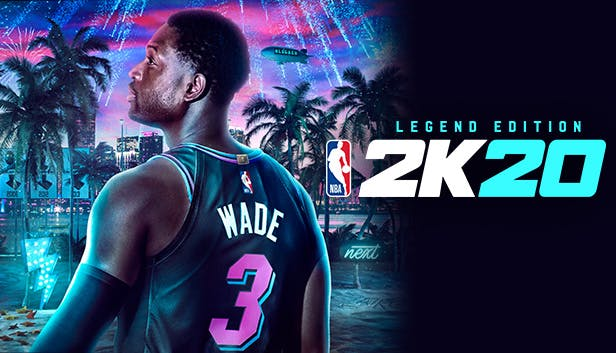[](http://)

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

from datetime import datetime, date

# Data Exploration

<h3 class="list-group-item list-group-item-action active">Let's take a look at the data</h3>

In [2]:
df = pd.read_csv('/kaggle/input/nba2k20-player-dataset/nba2k20-full.csv')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [3]:
print(f'There are {df.shape[0]} players (rows) and {df.shape[1]} columns.\n')
print(f'Column names: {df.columns.values}')

There are 429 players (rows) and 14 columns.

Column names: ['full_name' 'rating' 'jersey' 'team' 'position' 'b_day' 'height' 'weight'
 'salary' 'country' 'draft_year' 'draft_round' 'draft_peak' 'college']


<h3 class="list-group-item list-group-item-action active">Which player got the best and worst rating?</h3>


In [4]:
print(f"The best rating is {df.rating.max()} which are held by {df.loc[df.rating == df.rating.max()].full_name.values[0]} and {df.loc[df.rating == df.rating.max()].full_name.values[1]}\n")
print(f"The worst rating is {df.rating.min()} which is held by {df.loc[df.rating == df.rating.min()].full_name.values[0]}")

The best rating is 97 which are held by LeBron James and Kawhi Leonard

The worst rating is 67 which is held by Duncan Robinson


<h3 class="list-group-item list-group-item-action active">Which number player like picking as jersey?</h3>

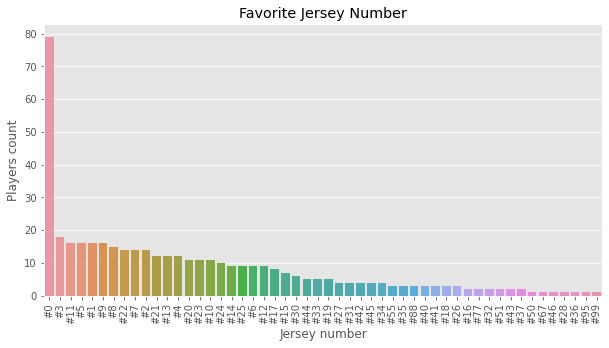

In [5]:
jersey_number = df[['jersey','full_name']].groupby('jersey').count().sort_values(by='full_name',ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=jersey_number.index, y=jersey_number.full_name)
plt.xticks(rotation=90)
plt.xlabel('Jersey number')
plt.ylabel('Players count')
plt.title('Favorite Jersey Number')
plt.show()

Wow! **#0** is the most popular number.

<h3 class="list-group-item list-group-item-action active">How about player's country?</h3>

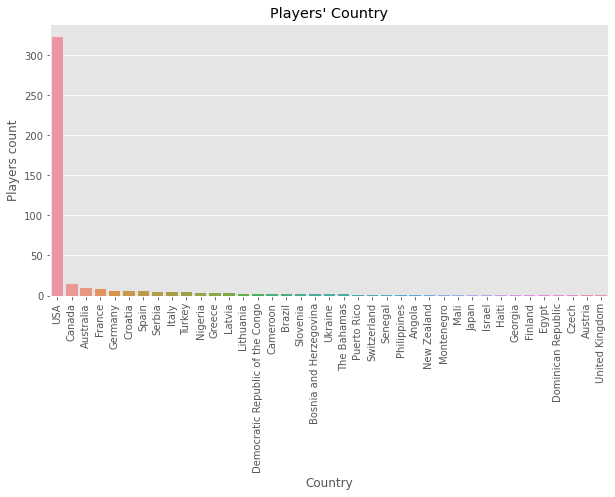

In [6]:
country = df[['country','full_name']].groupby('country').count().sort_values(by='full_name',ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=country.index, y=country.full_name)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Players count')
plt.title('Players\' Country')
plt.show()

Without doubt, it's **USA**. Now, which country got the best average rating?

<h3 class="list-group-item list-group-item-action active">Country based on rating</h3>

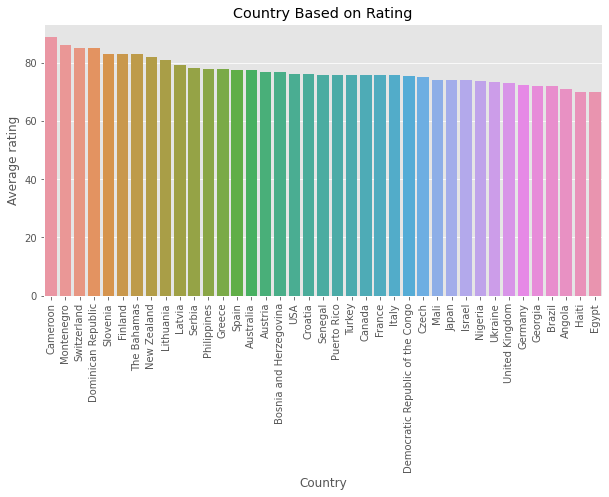

In [7]:
country_rating = df[['country','rating']].groupby('country').mean().sort_values(by='rating',ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=country_rating.index, y=country_rating.rating)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Average rating')
plt.title('Country Based on Rating')
plt.show()

<h3 class="list-group-item list-group-item-action active">Which team is the most diverse?</h3>

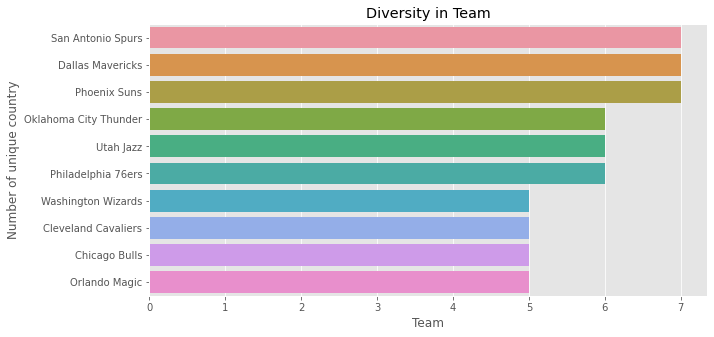

In [8]:
country_nunique = df.groupby(['team'])['country'].nunique().sort_values(ascending = False).head(10)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=country_nunique.values, y=country_nunique.index)
plt.xticks()
plt.xlabel('Team')
plt.ylabel('Number of unique country')
plt.title('Diversity in Team')
plt.show()

<h3 class="list-group-item list-group-item-action active">How old are the players?</h3>

In [9]:
def get_age(birthday): 
    today = date.today() 
    age = today.year - birthday.year - ((today.month, today.day) < (birthday.month, birthday.day))
    return age

df['b_day'] = pd.to_datetime(df['b_day'])
df['age'] = df['b_day'].apply(lambda x : get_age(x))
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,age
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,36
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,30
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,26
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,32
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,32


In [10]:
print(f"The oldest player is {df[df.age == df.age.max()].full_name.values[0]} ({df.age.max()} years old)\n")
print(f"The youngest player are {df[df.age == df.age.min()].full_name.values[0]} and {df[df.age == df.age.min()].full_name.values[1]} ({df.age.min()} years old)")

The oldest player is Pau Gasol (41 years old)

The youngest player are Sekou Doumbouya and Talen Horton-Tucker (20 years old)


<h3 class="list-group-item list-group-item-action active">Any free agents?</h3>

In [11]:
free_agents = df[df['team'].isna()]
print(f'There are {free_agents.shape[0]} free agents.')
free_agents.head(5)

There are 23 free agents.


,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,age
33,DeMarcus Cousins,86,#0,NaN,C,1990-08-13,6-10 / 2.08,270 lbs. / 122.5 kg.,$3500000,USA,2010,1,5,Kentucky,31
168,Michael Beasley,76,#0,NaN,F,1989-01-09,6-10 / 2.08,235 lbs. / 106.6 kg.,$3500000,USA,2008,1,2,Kansas State,32
177,Gerald Green,76,#0,NaN,F-G,1986-01-26,6-6 / 1.98,192 lbs. / 87.1 kg.,$2564753,USA,2005,1,18,NaN,35
198,Isaiah Thomas,76,#0,NaN,G,1989-02-07,5-9 / 1.75,185 lbs. / 83.9 kg.,$2320044,USA,2011,2,60,Washington,32
203,Pau Gasol,75,#0,NaN,C,1980-07-06,7-1 / 2.16,250 lbs. / 113.4 kg.,$5538540,Spain,2001,1,3,NaN,41


<h3 class="list-group-item list-group-item-action active">Which team got the best rating?</h3>

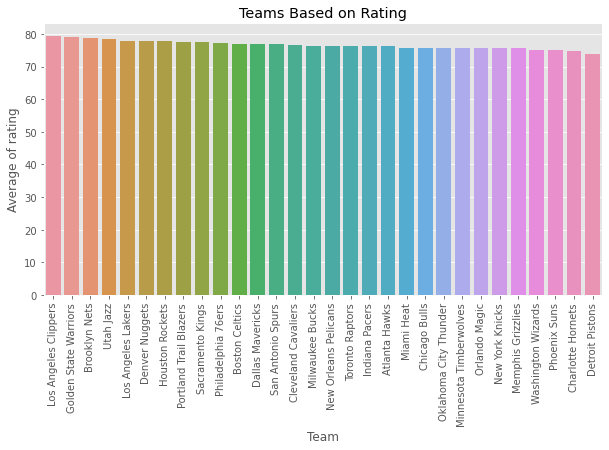

In [12]:
team_rating = df[['team','rating']].groupby('team').mean().sort_values(by='rating', ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=team_rating.index, y=team_rating.rating)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Average of rating')
plt.title('Teams Based on Rating')
plt.show()

**Milwaukee Bucks** got the best average of rating.

<h3 class="list-group-item list-group-item-action active">Which team has the most number of players?</h3>

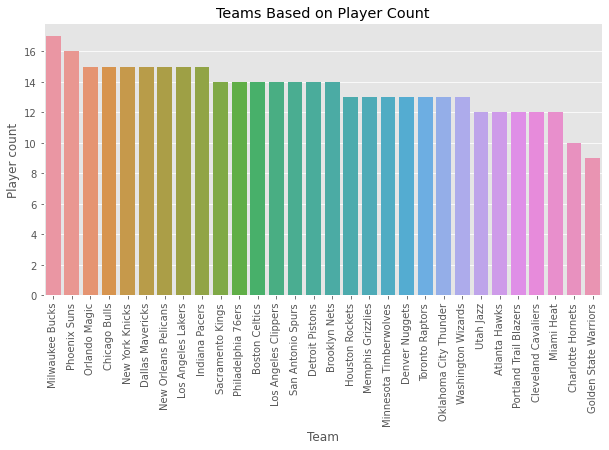

In [13]:
player_count = df[['team','full_name']].groupby('team').count().sort_values(by='full_name', ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=player_count.index, y=player_count.full_name)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Player count')
plt.title('Teams Based on Player Count')
plt.show()

<h3 class="list-group-item list-group-item-action active">Who got the highest and lowest salary?</h3>

In [14]:
print(f"The biggest salary is {df.salary.max()} which is held by {df[df.salary == df.salary.max()].full_name.values[0]} \n")
print(f"The lowest salary is {df.salary.min()} which is held by {df[df.salary == df.salary.min()].full_name.values[0]}")

The biggest salary is $9881598 which is held by DeAndre Jordan 

The lowest salary is $100000 which is held by Yante Maten


Now let's look at the salary distribution

In [15]:
def get_salary(salary):
    salary = salary.replace('$', '')
    return float(salary)

df['salary'] = df['salary'].apply(lambda x: get_salary(x))
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,age
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858.0,USA,2003,1,1,NaN,36
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000.0,USA,2011,1,15,San Diego State,30
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697.0,Greece,2013,1,15,NaN,26
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000.0,USA,2007,1,2,Texas,32
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000.0,USA,2009,1,3,Arizona State,32


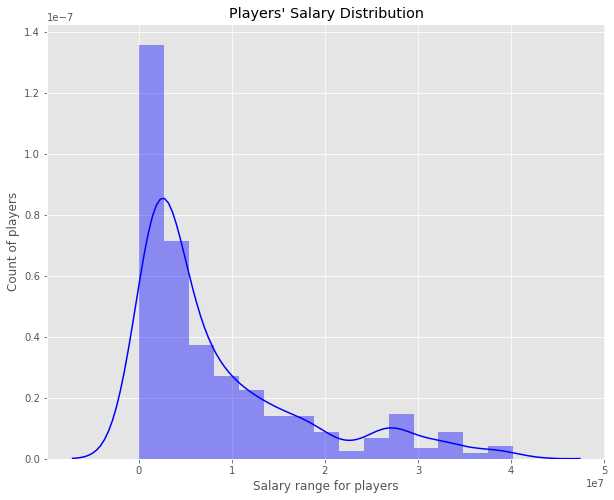

In [16]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.distplot(df['salary'], color = 'blue')
plt.xlabel('Salary range for players')
plt.ylabel('Count of players')
plt.title('Players\' Salary Distribution')
plt.xticks()
plt.show()

In [17]:
df.head(1)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,age
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858.0,USA,2003,1,1,NaN,36


<h3 class="list-group-item list-group-item-action active">What about players weight & height?</h3>

In [18]:
df['height'] = df['height'].apply(lambda x:float(x.split('/')[1]))
df['weight'] = df['weight'].apply(lambda x:x.split('/')[1].split('kg')[0]).astype('float64')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,age
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,2.06,113.4,37436858.0,USA,2003,1,1,NaN,36
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,2.01,102.1,32742000.0,USA,2011,1,15,San Diego State,30
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,2.11,109.8,25842697.0,Greece,2013,1,15,NaN,26
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,2.08,104.3,37199000.0,USA,2007,1,2,Texas,32
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,1.96,99.8,38199000.0,USA,2009,1,3,Arizona State,32


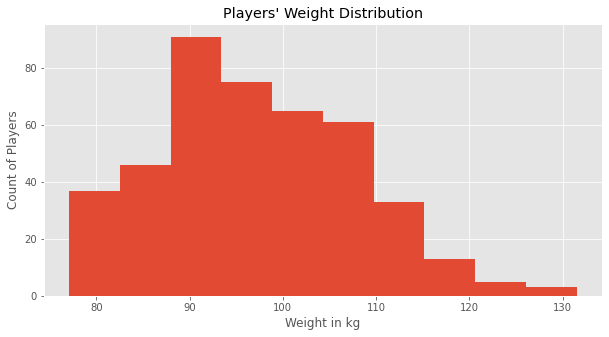

In [19]:
fig = plt.figure(figsize = (10, 5))
plt.hist(df.weight)
plt.xlabel('Weight in kg')
plt.ylabel('Count of Players')
plt.title('Players\' Weight Distribution')
plt.show()

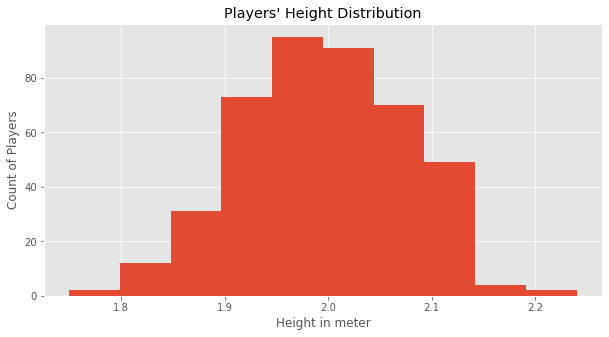

In [20]:
fig = plt.figure(figsize = (10, 5))
plt.hist(df.height)
plt.xlabel('Height in meter')
plt.ylabel('Count of Players')
plt.title('Players\' Height Distribution')
plt.show()

<h3 class="list-group-item list-group-item-action active">What position does most of the players play?</h3>

In [21]:
df.head(1)

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,age
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,2.06,113.4,37436858.0,USA,2003,1,1,NaN,36


In [22]:
df['position'] = df['position'].replace('F-G','G-F')
df['position'] = df['position'].replace('C-F','F-C')

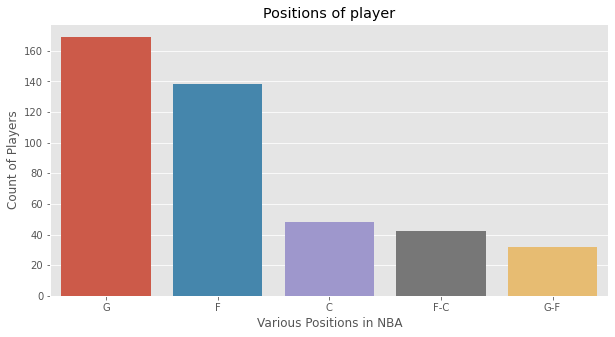

In [23]:
fig = plt.figure(figsize = (10, 5))
sns.countplot('position', data = df, order = df['position'].value_counts().index)
plt.xlabel('Various Positions in NBA')
plt.ylabel('Count of Players')
plt.title('Positions of player')
plt.show()

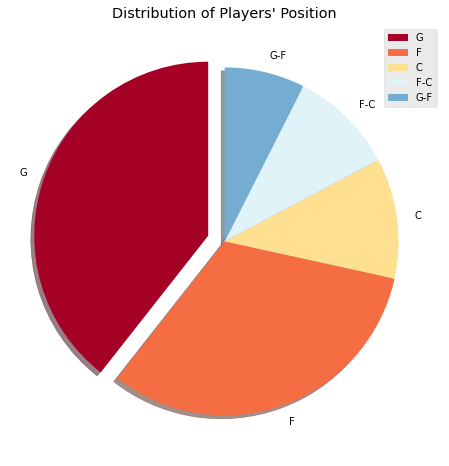

In [24]:
labels = ['G','F','C','F-C','G-F'] 
size = df['position'].value_counts()
colors = plt.cm.RdYlBu(np.linspace(0, 1, 6))
explode = [0.1,0, 0, 0, 0]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Players\' Position')
plt.legend()
plt.show()

Let's observe the average players' rating for each position

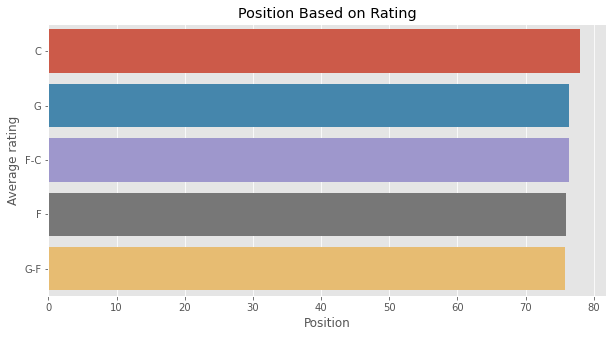

In [25]:
position_rating = df[['position','rating']].groupby('position').mean().sort_values(by='rating',ascending=False)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=position_rating.rating, y=position_rating.index)
plt.xticks()
plt.xlabel('Position')
plt.ylabel('Average rating')
plt.title('Position Based on Rating')
plt.show()

<h3 class="list-group-item list-group-item-action active">Which college bring up most of the NBA players?</h3>

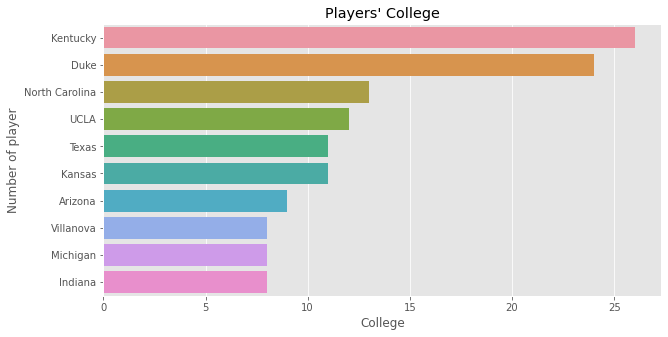

In [26]:
college = df.groupby(['college'])['full_name'].nunique().sort_values(ascending = False).head(10)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=college.values,y=college.index)
plt.xticks()
plt.xlabel('College')
plt.ylabel('Number of player')
plt.title('Players\' College')
plt.show()

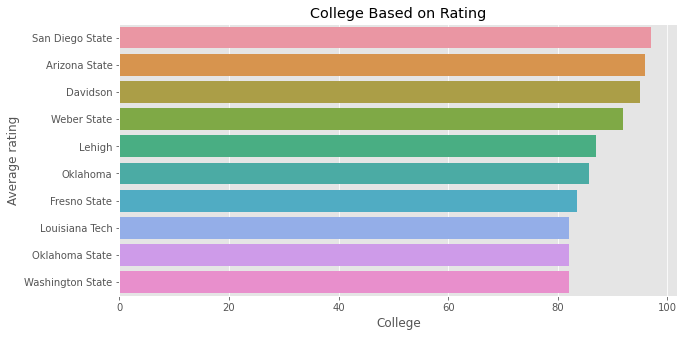

In [27]:
college_rating = df[['college','rating']].groupby('college').mean().sort_values(by='rating',ascending=False).head(10)
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=college_rating.rating, y=college_rating.index)
plt.xticks()
plt.xlabel('College')
plt.ylabel('Average rating')
plt.title('College Based on Rating')
plt.show()

# The Best of The Best

<h3 class="list-group-item list-group-item-action active">The Wonderkid</h3>
<br>Top 10 Young Players Based on Rating

In [28]:
df.sort_values(['age','rating'],ascending = False).reset_index()[['full_name', 'age', 'team', 'country', 'rating']].tail(10).style.background_gradient('Reds')

,full_name,age,team,country,rating
419,Romeo Langford,21,Boston Celtics,USA,72
420,Kevin Porter,21,Cleveland Cavaliers,USA,72
421,Luka Samanic,21,San Antonio Spurs,Croatia,72
422,Keldon Johnson,21,San Antonio Spurs,USA,72
423,Alen Smailagic,21,Golden State Warriors,Serbia,71
424,Darius Bazley,21,Oklahoma City Thunder,USA,70
425,Isaac Bonga,21,Washington Wizards,Germany,68
426,Jalen Lecque,21,Phoenix Suns,USA,68
427,Sekou Doumbouya,20,Detroit Pistons,France,73
428,Talen Horton-Tucker,20,Los Angeles Lakers,USA,70


<h3 class="list-group-item list-group-item-action active">The Old Gold</h3>
<br>Top 10 Old Players Based on Rating

In [29]:
df.sort_values(['age','rating'], ascending = False).reset_index()[['full_name', 'age', 'team', 'country', 'rating']].head(10).style.background_gradient('Reds')

,full_name,age,team,country,rating
0,Pau Gasol,41,nan,Spain,75
1,Kyle Korver,40,Milwaukee Bucks,USA,75
2,Tyson Chandler,38,Houston Rockets,USA,73
3,JJ Redick,37,New Orleans Pelicans,USA,80
4,Andre Iguodala,37,Miami Heat,USA,78
5,Jose Juan Barea,37,Dallas Mavericks,Puerto Rico,76
6,LeBron James,36,Los Angeles Lakers,USA,97
7,LaMarcus Aldridge,36,San Antonio Spurs,USA,87
8,Chris Paul,36,Oklahoma City Thunder,USA,85
9,Marc Gasol,36,Toronto Raptors,Spain,82


<h3 class="list-group-item list-group-item-action active">Best Shortest Player</h3>

In [30]:
df.sort_values(['height','rating'], ascending = True).reset_index()[['full_name', 'height', 'team', 'country', 'rating']].head(10).style.background_gradient('Greens')

,full_name,height,team,country,rating
0,Isaiah Thomas,1.750000,nan,USA,76
1,Jose Juan Barea,1.780000,Dallas Mavericks,Puerto Rico,76
2,Frank Mason,1.800000,Milwaukee Bucks,USA,71
3,Carsen Edwards,1.800000,Boston Celtics,USA,71
4,DJ Augustin,1.800000,Orlando Magic,USA,76
5,Brandon Goodwin,1.830000,Atlanta Hawks,USA,68
6,Tim Frazier,1.830000,nan,USA,72
7,Aaron Holiday,1.830000,Indiana Pacers,USA,73
8,Tyus Jones,1.830000,Memphis Grizzlies,USA,73
9,Ishmael Smith,1.830000,Washington Wizards,USA,73


<h3 class="list-group-item list-group-item-action active">Best Tallest Player</h3>

In [31]:
df.sort_values(['height','rating'], ascending = True).reset_index()[['full_name', 'height', 'team', 'country', 'rating']].tail(10).style.background_gradient('Greens')

,full_name,height,team,country,rating
419,Lauri Markkanen,2.130000,Chicago Bulls,Finland,83
420,Jusuf Nurkic,2.130000,Portland Trail Blazers,Bosnia and Herzegovina,83
421,Nikola Jokic,2.130000,Denver Nuggets,Serbia,90
422,Joel Embiid,2.130000,Philadelphia 76ers,Cameroon,91
423,Pau Gasol,2.160000,nan,Spain,75
424,Jakob Poeltl,2.160000,San Antonio Spurs,Austria,77
425,Rudy Gobert,2.160000,Utah Jazz,France,88
426,Luke Kornet,2.180000,Chicago Bulls,USA,71
427,Kristaps Porzingis,2.210000,Dallas Mavericks,Latvia,87
428,Boban Marjanovic,2.240000,Dallas Mavericks,Serbia,75


<h3 class="list-group-item list-group-item-action active">Best Player for Each Position</h3>

In [32]:
df.iloc[df.groupby(df['position'])['rating'].idxmax()].sort_values(by='rating', ascending=False).reset_index()[['position', 'full_name','age','team', 'country', 'rating']].style.background_gradient('Blues')

,position,full_name,age,team,country,rating
0,F,LeBron James,36,Los Angeles Lakers,USA,97
1,G,James Harden,32,Houston Rockets,USA,96
2,G-F,Giannis Antetokounmpo,26,Milwaukee Bucks,Greece,96
3,F-C,Anthony Davis,28,Los Angeles Lakers,USA,94
4,C,Joel Embiid,27,Philadelphia 76ers,Cameroon,91


<h3 class="list-group-item list-group-item-action active">Best Player for Each Team<h3>

In [33]:
df.iloc[df.groupby(df['team'])['rating'].idxmax()].reset_index().sort_values(by='rating', ascending=False).reset_index()[['position', 'full_name','age','team', 'country', 'rating']].style.background_gradient('Blues')

,position,full_name,age,team,country,rating
0,F,Kawhi Leonard,30,Los Angeles Clippers,USA,97
1,F,LeBron James,36,Los Angeles Lakers,USA,97
2,G-F,Giannis Antetokounmpo,26,Milwaukee Bucks,Greece,96
3,F,Kevin Durant,32,Brooklyn Nets,USA,96
4,G,James Harden,32,Houston Rockets,USA,96
5,G,Stephen Curry,33,Golden State Warriors,USA,95
6,G,Damian Lillard,31,Portland Trail Blazers,USA,92
7,C,Joel Embiid,27,Philadelphia 76ers,Cameroon,91
8,C,Nikola Jokic,26,Denver Nuggets,Serbia,90
9,F-C,Karl-Anthony Towns,25,Minnesota Timberwolves,USA,89


<h3 class="list-group-item list-group-item-action active">Best Player for Each Country<h3>

In [34]:
df.iloc[df.groupby(df['country'])['rating'].idxmax()].reset_index().sort_values(by='rating', ascending=False).reset_index()[['position', 'full_name','age','team', 'country', 'rating']].style.background_gradient('Blues')

,position,full_name,age,team,country,rating
0,F,LeBron James,36,Los Angeles Lakers,USA,97
1,G-F,Giannis Antetokounmpo,26,Milwaukee Bucks,Greece,96
2,C,Joel Embiid,27,Philadelphia 76ers,Cameroon,91
3,G,Kyrie Irving,29,Brooklyn Nets,Australia,91
4,C,Nikola Jokic,26,Denver Nuggets,Serbia,90
5,C,Rudy Gobert,29,Utah Jazz,France,88
6,G-F,Luka Doncic,22,Dallas Mavericks,Slovenia,87
7,F-C,Kristaps Porzingis,26,Dallas Mavericks,Latvia,87
8,C,Nikola Vucevic,30,Orlando Magic,Montenegro,86
9,F-C,Al Horford,35,Philadelphia 76ers,Dominican Republic,85


<h3 class="list-group-item list-group-item-action active">Best Player for Each College<h3>

In [35]:
df.iloc[df.groupby(df['college'])['rating'].idxmax()].reset_index().sort_values(by='rating', ascending=False).reset_index()[['position','college' ,'full_name','age','team', 'country', 'rating']].style.background_gradient('Blues')

,position,college,full_name,age,team,country,rating
0,F,San Diego State,Kawhi Leonard,30,Los Angeles Clippers,USA,97
1,F,Texas,Kevin Durant,32,Brooklyn Nets,USA,96
2,G,Arizona State,James Harden,32,Houston Rockets,USA,96
3,G,Davidson,Stephen Curry,33,Golden State Warriors,USA,95
4,F-C,Kentucky,Anthony Davis,28,Los Angeles Lakers,USA,94
5,F,Fresno State,Paul George,31,Los Angeles Clippers,USA,93
6,G,Weber State,Damian Lillard,31,Portland Trail Blazers,USA,92
7,C,Kansas,Joel Embiid,27,Philadelphia 76ers,Cameroon,91
8,G,Duke,Kyrie Irving,29,Brooklyn Nets,Australia,91
9,G,UCLA,Russell Westbrook,32,Houston Rockets,USA,90
